In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

In [14]:
data = pd.read_csv('wine.data')
data.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, data['1'], test_size=0.4, random_state=0)

In [43]:
y = data['1']
X = data.drop('1', axis=1)



In [44]:
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn = KNeighborsClassifier(n_neighbors=1)

In [48]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [53]:
pred = knn.predict(X_test)

In [54]:
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
print(confusion_matrix(y_test,pred))

[[21  0  1]
 [ 1 23  5]
 [ 3  7 10]]


In [56]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          1       0.84      0.95      0.89        22
          2       0.77      0.79      0.78        29
          3       0.62      0.50      0.56        20

avg / total       0.75      0.76      0.75        71



In [49]:
kf = KFold(len(y), n_folds=5, shuffle=True, random_state=42)

In [50]:
error_rate = []

# Will take some time
for i in range(1,51):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

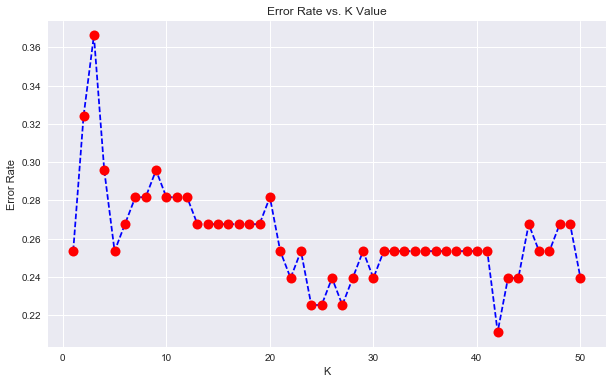

In [62]:
plt.figure(figsize=(10,6))
plt.plot(range(1,51),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [63]:
knn.score(X_test,y_test)

0.76056338028169013

In [64]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[20  0  2]
 [ 1 23  5]
 [ 4  6 10]]


             precision    recall  f1-score   support

          1       0.80      0.91      0.85        22
          2       0.79      0.79      0.79        29
          3       0.59      0.50      0.54        20

avg / total       0.74      0.75      0.74        71



In [65]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[22  0  0]
 [ 1 19  9]
 [ 3  5 12]]


             precision    recall  f1-score   support

          1       0.85      1.00      0.92        22
          2       0.79      0.66      0.72        29
          3       0.57      0.60      0.59        20

avg / total       0.75      0.75      0.74        71

